In [38]:
#Contents:
#Creating Region, Exclusion Lists, Building Customer Profile, Adding Visualizations on Customer Profile 

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
pd.options.display.max_columns = 100

In [2]:
#Setting path location to import data set
path = r'/Users/thaliagiraldo/Documents/Nov 2023 Instacart Basket Analysis'

In [3]:
#Import Data Set
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_cust_merged_updated.pkl'))

In [4]:
df.head()

,Product_id,Product_name,Aisle_id,Department_id,Prices,Order_id,User_id,Order_number,Orders_day_of_week,Order_hour_of_day,Days_since_last_order,Add_to_cart_order,Reordered,Price_range_loc,Busiest_day,Busiest_days,Busiest_period_of_day,Max_order,Loyalty_flag,Average_price,Spending_flag,Median_days_since_last_order,Frequency_flag,First_name,Last_name,Gender,State,Age,Date_joined,N_dependants,Fam_status,Income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Regularly busy,Regularly busy,Most_orders,32,Regular customer,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,Regularly busy,Regularly busy,Average_orders,32,Regular customer,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4,0,High-range product,Regularly busy,Regularly busy,Average_orders,32,Regular customer,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,High-range product,Regularly busy,Regularly busy,Most_orders,32,Regular customer,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,Mid-range product,Regularly busy,Regularly busy,Average_orders,32,Regular customer,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620


In [5]:
#There is PII in this dataset (FName, LName, Gender,State, Age,Fam Status, Income). Discuss with stakeholder how he wants to handle info

In [6]:
# Define a dictionary mapping each state to its corresponding region
state_to_region = {
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast', 'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast', 'New Jersey': 'Northeast', 'New York':'Northeast', 'Pennsylvania':'Northeast',
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest', 'Ohio': 'Midwest', 'Wisconsin': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest', 'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest',
    'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South', 'Maryland': 'South', 'North Carolina': 'South', 'South Carolina': 'South', 'Virginia': 'South', 'District of Columbia': 'South', 'West Virginia': 'South', 'Alabama': 'South', 'Kentucky': 'South', 'Mississippi': 'South', 'Tennessee': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Oklahoma': 'South', 'Texas': 'South',
    'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West', 'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West', 'Utah': 'West', 'Wyoming': 'West', 'Alaska': 'West', 'California': 'West', 'Hawaii': 'West', 'Oregon': 'West', 'Washington': 'West'
}

# Map the states to regions and create a new 'Region' column
df['Region'] = df['State'].map(state_to_region)

print(df[['State', 'Region']])

              State     Region
0         Minnesota    Midwest
1         Minnesota    Midwest
2         Minnesota    Midwest
3         Minnesota    Midwest
4         Minnesota    Midwest
...             ...        ...
32404854    Alabama      South
32404855    Vermont  Northeast
32404856    Vermont  Northeast
32404857    Vermont  Northeast
32404858    Vermont  Northeast

[32404859 rows x 2 columns]


In [7]:
crosstab = pd.crosstab(df['Region'], df['Spending_flag'], dropna = False)

In [8]:
crosstab.to_clipboard()

# The South has the highest number of High Spenders and Low Spenders

Region	High spender	Low spender
South	209691	10582194
West	160354	8132559
Midwest	155975	7441350
Northeast	108225	5614511

In [9]:
#Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [10]:
#Step 1 - Split Data into Groups - group data based on the criteria you are researching -  I want to find the count for orders for each user
#i've already created a column called max order in assignment 8 that i can use to create a flag for orders less than 5
#ords_prods_merge['max_order'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)

In [11]:
#Step 2 - Create a NEW COLUMN WITH .loc - label/flag for low activity customer
df.loc[df['Max_order'] <= 5, 'Exclusion_flag'] = 'Low_activity'
df.loc[df['Max_order'] > 6, 'Exclusion_flag'] = 'Regular_activity'

/var/folders/t7/fy2gbqpj7r54t9fzj4_6j2v80000gn/T/ipykernel_42837/1519005673.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low_activity' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Max_order'] <= 5, 'Exclusion_flag'] = 'Low_activity'


In [12]:
df.head()

,Product_id,Product_name,Aisle_id,Department_id,Prices,Order_id,User_id,Order_number,Orders_day_of_week,Order_hour_of_day,Days_since_last_order,Add_to_cart_order,Reordered,Price_range_loc,Busiest_day,Busiest_days,Busiest_period_of_day,Max_order,Loyalty_flag,Average_price,Spending_flag,Median_days_since_last_order,Frequency_flag,First_name,Last_name,Gender,State,Age,Date_joined,N_dependants,Fam_status,Income,Region,Exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Regularly busy,Regularly busy,Most_orders,32,Regular customer,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Regular_activity
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,Regularly busy,Regularly busy,Average_orders,32,Regular customer,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Regular_activity
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4,0,High-range product,Regularly busy,Regularly busy,Average_orders,32,Regular customer,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Regular_activity
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,High-range product,Regularly busy,Regularly busy,Most_orders,32,Regular customer,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Regular_activity
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,Mid-range product,Regularly busy,Regularly busy,Average_orders,32,Regular customer,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Regular_activity


In [13]:
df_filtered = df[df['Exclusion_flag'] == 'Regular_activity']

In [14]:
df_filtered.head(1)

,Product_id,Product_name,Aisle_id,Department_id,Prices,Order_id,User_id,Order_number,Orders_day_of_week,Order_hour_of_day,Days_since_last_order,Add_to_cart_order,Reordered,Price_range_loc,Busiest_day,Busiest_days,Busiest_period_of_day,Max_order,Loyalty_flag,Average_price,Spending_flag,Median_days_since_last_order,Frequency_flag,First_name,Last_name,Gender,State,Age,Date_joined,N_dependants,Fam_status,Income,Region,Exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Regularly busy,Regularly busy,Most_orders,32,Regular customer,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Regular_activity


In [15]:
df.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'ords_prods_merged_exclusionflag.pkl'))

Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 
#Create a new column for the data
#Group data based on variables 

In [16]:
# Count the number of purchases in the 'babies' department
babies_purchases = df[df['Department_id'] == 18].groupby('User_id')['Order_id'].count().reset_index()
babies_purchases.rename(columns={'Order_id': 'babies_department_purchases'}, inplace=True)

# Merge the count back into the main DataFrame
df = pd.merge(df, babies_purchases, on='User_id', how='left')

In [17]:
# Adding a new column called 'Customer_profile'
# Create profiles for different income parents and potential grandparents
df.loc[
    ((df['Age'] <= 45) & (df['N_dependants'] >= 1) & (df['babies_department_purchases'] > 5) & (df['Income'] < 56000)),
    'Customer_profile'] = 'Young_Parent_LI'

df.loc[
    ((df['Age'] <= 45) & (df['N_dependants'] >= 1) & (df['babies_department_purchases'] > 5) & (df['Income'] >= 56000) & (df['Income'] <= 114000)),
    'Customer_profile'] = 'Young_Parent_MI'

df.loc[
    ((df['Age'] <= 45) & (df['N_dependants'] >= 1) & (df['babies_department_purchases'] > 5) & (df['Income'] >= 114000)),
    'Customer_profile'] = 'Young_Parent_HI'

df.loc[
    ((df['Age'] >= 46) & (df['N_dependants'] >= 1) & (df['babies_department_purchases'] > 5) & (df['Income'] <= 56000)),
    'Customer_profile'] = 'Adult_Parent_LI'

df.loc[
    ((df['Age'] >= 46) & (df['N_dependants'] >= 1) & (df['babies_department_purchases'] > 5) & (df['Income'] >= 56000) & (df['Income'] <= 114000)),
    'Customer_profile'] = 'Adult_Parent_MI'

df.loc[
    ((df['Age'] >= 46) & (df['N_dependants'] >= 1) & (df['babies_department_purchases'] > 5) & (df['Income'] >= 114000)),
    'Customer_profile'] = 'Adult_Parent_HI'

# Assign 'Other' to anyone not meeting the specified conditions
df.loc[df['Customer_profile'].isnull(), 'Customer_profile'] = 'Other'

/var/folders/t7/fy2gbqpj7r54t9fzj4_6j2v80000gn/T/ipykernel_42837/2285003931.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Young_Parent_LI' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[


In [18]:
df.head()

,Product_id,Product_name,Aisle_id,Department_id,Prices,Order_id,User_id,Order_number,Orders_day_of_week,Order_hour_of_day,Days_since_last_order,Add_to_cart_order,Reordered,Price_range_loc,Busiest_day,Busiest_days,Busiest_period_of_day,Max_order,Loyalty_flag,Average_price,Spending_flag,Median_days_since_last_order,Frequency_flag,First_name,Last_name,Gender,State,Age,Date_joined,N_dependants,Fam_status,Income,Region,Exclusion_flag,babies_department_purchases,Customer_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Regularly busy,Regularly busy,Most_orders,32,Regular customer,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Regular_activity,NaN,Other
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,Regularly busy,Regularly busy,Average_orders,32,Regular customer,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Regular_activity,NaN,Other
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4,0,High-range product,Regularly busy,Regularly busy,Average_orders,32,Regular customer,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Regular_activity,NaN,Other
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,High-range product,Regularly busy,Regularly busy,Most_orders,32,Regular customer,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Regular_activity,NaN,Other
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,Mid-range product,Regularly busy,Regularly busy,Average_orders,32,Regular customer,6.935811,Low spender,8.0,Frequent_customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,Regular_activity,NaN,Other


In [19]:
#Checking profiles 
df['Customer_profile'].value_counts()

Customer_profile
Other              28264370
Young_Parent_MI     1320222
Adult_Parent_HI     1307042
Adult_Parent_MI      900501
Young_Parent_LI      304140
Young_Parent_HI      199919
Adult_Parent_LI      108665
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

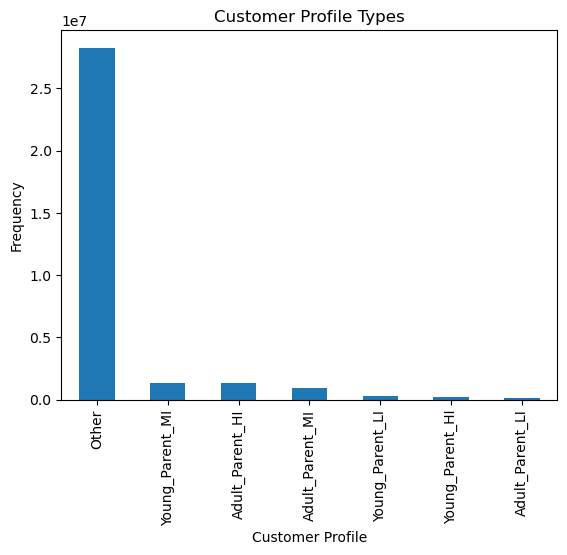

In [20]:
#Create a bar chart to see the visualize distribution 
All_cust_types_bar = df['Customer_profile'].value_counts().plot.bar()
plt.title('Customer Profile Types')
plt.xlabel('Customer Profile')
plt.ylabel('Frequency')

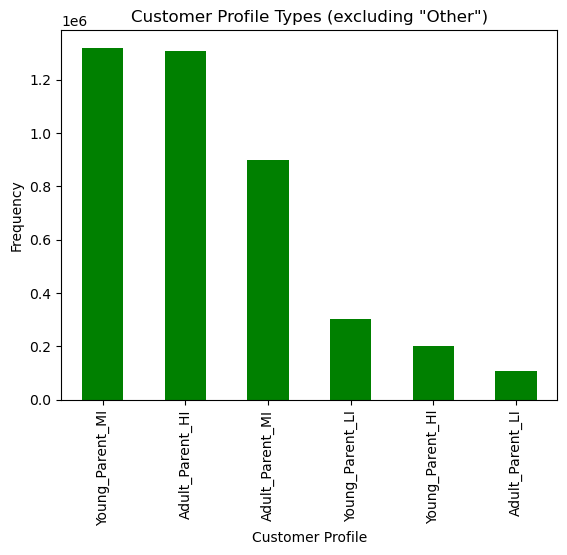

In [21]:
# Filter out the 'Other' category
filteredbar_df = df[df['Customer_profile'] != 'Other']

# Plot the bar chart for the filtered DataFrame
Cust_types_bar = filteredbar_df['Customer_profile'].value_counts().plot.bar(color = ['green'])
plt.title('Customer Profile Types (excluding "Other")')
plt.xlabel('Customer Profile')
plt.ylabel('Frequency')

plt.show()


In [22]:
All_cust_types_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'all_cust_types.png'))
Cust_types_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_types_parents.png'))

In [23]:
# Group by 'Customer_profile' and calculate max, mean, and min for 'usage_frequency' and 'expenditure'
profile_aggregation = df.groupby('Customer_profile').agg({
    'Days_since_last_order': ['max', 'mean', 'min'],
    'Prices': ['max', 'mean', 'min']
})

In [24]:
profile_aggregation

Days_since_last_order                 Prices               
                                   max       mean  min    max      mean  min
Customer_profile                                                            
Adult_Parent_HI                   30.0   8.731398  0.0   25.0  7.898523  1.0
Adult_Parent_LI                   30.0   9.104855  0.0   25.0  6.724796  1.0
Adult_Parent_MI                   30.0   8.921399  0.0   25.0  7.881113  1.0
Other                             30.0  11.457401  0.0   25.0  7.784479  1.0
Young_Parent_HI                   30.0   8.542266  0.0   25.0  7.918592  1.0
Young_Parent_LI                   30.0   8.901037  0.0   25.0  7.488180  1.0
Young_Parent_MI                   30.0   8.686610  0.0   25.0  7.900741  1.0

In [25]:
#Compare your customer profiles with regions and departments. 
#Can you identify a link between them? 
#Customers may demonstrate different behaviors across regions, which could make this information important.
df[['Customer_profile', 'Region', 'Department_id']]

,Customer_profile,Region,Department_id
0,Other,Midwest,19
1,Other,Midwest,19
2,Other,Midwest,12
3,Other,Midwest,12
4,Other,Midwest,10
...,...,...,...
32404854,Other,South,16
32404855,Other,Northeast,7
32404856,Other,Northeast,7
32404857,Other,Northeast,7


In [26]:
#Checking to make sure data has not changed 
df['Customer_profile'].value_counts()

Customer_profile
Other              28264370
Young_Parent_MI     1320222
Adult_Parent_HI     1307042
Adult_Parent_MI      900501
Young_Parent_LI      304140
Young_Parent_HI      199919
Adult_Parent_LI      108665
Name: count, dtype: int64

In [27]:
#Creating a pivot table to look at the counts of profiles within each state
crosstab_region = pd.crosstab(df['Customer_profile'], df['Region'],dropna = False)

In [28]:
crosstab_region.to_clipboard()

In [29]:
#Dropping the 'Other' column and transposing x and y axis for the bar chart
crosstab_region_parents = crosstab_region.drop('Other')
crosstab_region_parents = crosstab_region_parents.T

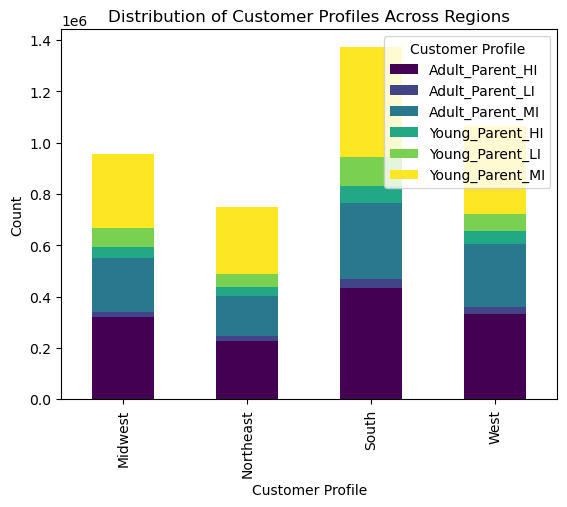

In [30]:
# Plotting using the plot method on the crosstab DataFrame
ax = crosstab_region_parents.plot(kind='bar', stacked=True, colormap='viridis')

# Adding labels and title
plt.title('Distribution of Customer Profiles Across Regions')
plt.xlabel('Customer Profile')
plt.ylabel('Count')

# Display the legend
plt.legend(title='Customer Profile', loc='upper right')

# Show the plot
plt.show()

In [31]:
#Group by region. Then count Department popularity by PROFILE 

In [32]:
#Findiing the top department across profiles and regions
df.groupby(['Region', 'Customer_profile'])['Department_id'].agg(lambda x: x.value_counts().idxmax())


Region     Customer_profile
Midwest    Adult_Parent_HI     4
           Adult_Parent_LI     4
           Adult_Parent_MI     4
           Other               4
           Young_Parent_HI     4
           Young_Parent_LI     4
           Young_Parent_MI     4
Northeast  Adult_Parent_HI     4
           Adult_Parent_LI     4
           Adult_Parent_MI     4
           Other               4
           Young_Parent_HI     4
           Young_Parent_LI     4
           Young_Parent_MI     4
South      Adult_Parent_HI     4
           Adult_Parent_LI     4
           Adult_Parent_MI     4
           Other               4
           Young_Parent_HI     4
           Young_Parent_LI     4
           Young_Parent_MI     4
West       Adult_Parent_HI     4
           Adult_Parent_LI     4
           Adult_Parent_MI     4
           Other               4
           Young_Parent_HI     4
           Young_Parent_LI     4
           Young_Parent_MI     4
Name: Department_id, dtype: int64

In [33]:
#Comparing profiles and regions

df.groupby(['Region', 'Customer_profile'])['Department_id'].agg(lambda x: x.value_counts().nlargest(5).index.tolist())


Region     Customer_profile
Midwest    Adult_Parent_HI     [4, 16, 19, 1, 18]
           Adult_Parent_LI      [4, 16, 19, 7, 1]
           Adult_Parent_MI     [4, 16, 19, 1, 18]
           Other                [4, 16, 19, 7, 1]
           Young_Parent_HI     [4, 16, 19, 1, 18]
           Young_Parent_LI     [4, 16, 19, 18, 1]
           Young_Parent_MI     [4, 16, 19, 18, 1]
Northeast  Adult_Parent_HI     [4, 16, 19, 18, 1]
           Adult_Parent_LI     [4, 16, 19, 18, 7]
           Adult_Parent_MI     [4, 16, 19, 18, 1]
           Other                [4, 16, 19, 7, 1]
           Young_Parent_HI      [4, 16, 19, 7, 1]
           Young_Parent_LI     [4, 16, 19, 1, 18]
           Young_Parent_MI     [4, 16, 19, 1, 18]
South      Adult_Parent_HI     [4, 16, 19, 18, 1]
           Adult_Parent_LI     [4, 16, 19, 18, 7]
           Adult_Parent_MI     [4, 16, 19, 18, 1]
           Other                [4, 16, 19, 7, 1]
           Young_Parent_HI     [4, 16, 18, 19, 1]
           Young_Paren

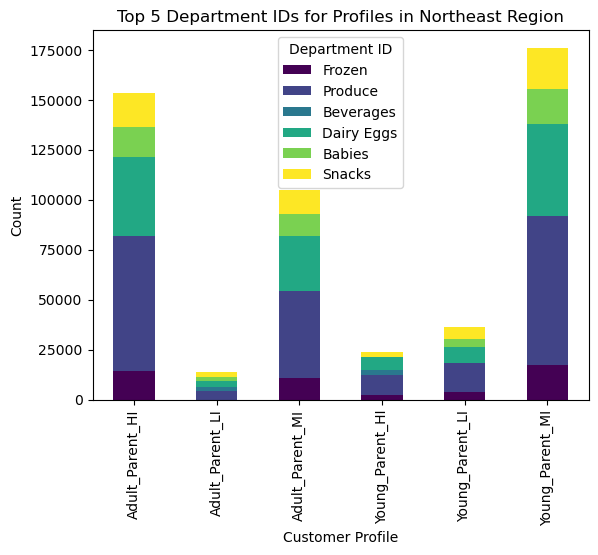

In [34]:
# Filter the dataframe for the Northeast region and exclude 'Other' profiles
northeast_data = df[(df['Region'] == 'Northeast') & (df['Customer_profile'] != 'Other')]

# Group by Customer Profile and find the top 5 most common Department IDs
top3_dept = northeast_data.groupby('Customer_profile')['Department_id'].value_counts().groupby(level=0, group_keys=False).nlargest(5).reset_index(name='Count')

# Pivot the data for plotting
pivot_table = top3_dept.pivot(index='Customer_profile', columns='Department_id', values='Count').fillna(0)

# Rename the columns (Department IDs) with desired labels
department_labels = {1: 'Frozen', 4: 'Produce', 7: 'Beverages', 16: 'Dairy Eggs', 18: 'Babies', 19: 'Snacks'}
pivot_table.rename(columns=department_labels, inplace=True)


# Plotting the bar chart
pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Top 5 Department IDs for Profiles in Northeast Region')
plt.xlabel('Customer Profile')
plt.ylabel('Count')
plt.legend(title='Department ID')


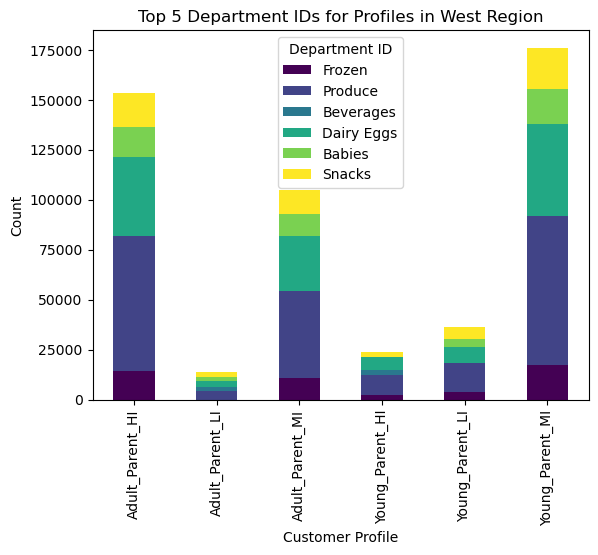

In [35]:
# Filter the dataframe for the West region and exclude 'Other' profiles
west_data = df[(df['Region'] == 'West') & (df['Customer_profile'] != 'Other')]

# Group by Customer Profile and find the top 3 most common Department IDs
top3_dept_west = west_data.groupby('Customer_profile')['Department_id'].value_counts().groupby(level=0, group_keys=False).nlargest(5).reset_index(name='Count')

# Pivot the data for plotting
pivot_table_west = top3_dept_west.pivot(index='Customer_profile', columns='Department_id', values='Count').fillna(0)


# Rename the columns (Department IDs) with desired labels
department_labels = {1: 'Frozen', 4: 'Produce', 7: 'Beverages', 16: 'Dairy Eggs', 18: 'Babies', 19: 'Snacks'}
pivot_table.rename(columns=department_labels, inplace=True)

# Plotting the bar chart
pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Top 5 Department IDs for Profiles in West Region')
plt.xlabel('Customer Profile')
plt.ylabel('Count')
plt.legend(title='Department ID')


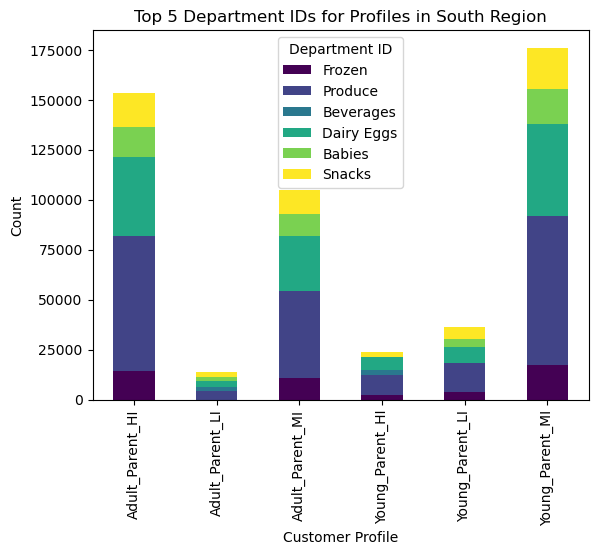

In [36]:
# Filter the dataframe for the South region and exclude 'Other' profiles
south_data = df[(df['Region'] == 'South') & (df['Customer_profile'] != 'Other')]

# Group by Customer Profile and find the top 3 most common Department IDs
top3_dept_south = south_data.groupby('Customer_profile')['Department_id'].value_counts().groupby(level=0, group_keys=False).nlargest(5).reset_index(name='Count')

# Pivot the data for plotting
pivot_table_south = top3_dept_south.pivot(index='Customer_profile', columns='Department_id', values='Count').fillna(0)


# Rename the columns (Department IDs) with desired labels
department_labels = {1: 'Frozen', 4: 'Produce', 7: 'Beverages', 16: 'Dairy Eggs', 18: 'Babies', 19: 'Snacks'}
pivot_table.rename(columns=department_labels, inplace=True)

# Plotting the bar chart
pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Top 5 Department IDs for Profiles in South Region')
plt.xlabel('Customer Profile')
plt.ylabel('Count')
plt.legend(title='Department ID')


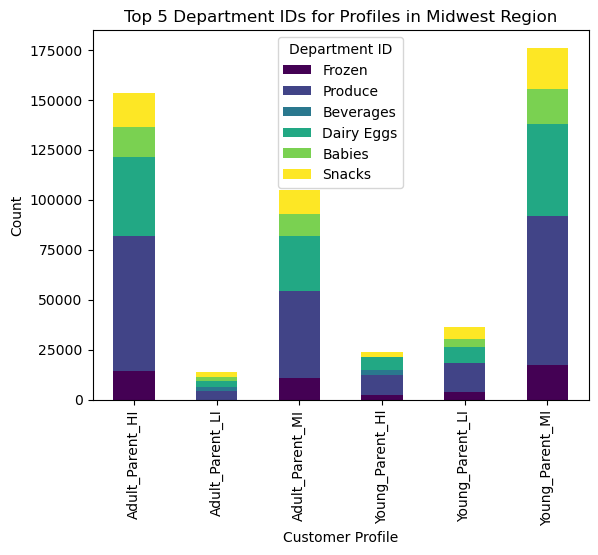

In [37]:
# Filter the dataframe for the South region and exclude 'Other' profiles
midwest_data = df[(df['Region'] == 'Midwest') & (df['Customer_profile'] != 'Other')]

# Group by Customer Profile and find the top 3 most common Department IDs
top3_dept_midwest = midwest_data.groupby('Customer_profile')['Department_id'].value_counts().groupby(level=0, group_keys=False).nlargest(5).reset_index(name='Count')

# Pivot the data for plotting
pivot_table_midwest = top3_dept_midwest.pivot(index='Customer_profile', columns='Department_id', values='Count').fillna(0)

# Rename the columns (Department IDs) with desired labels
department_labels = {1: 'Frozen', 4: 'Produce', 7: 'Beverages', 16: 'Dairy Eggs', 18: 'Babies', 19: 'Snacks'}
pivot_table.rename(columns=department_labels, inplace=True)

# Plotting the bar chart
pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Top 5 Department IDs for Profiles in Midwest Region')
plt.xlabel('Customer Profile')
plt.ylabel('Count')
plt.legend(title='Department ID')
